# Google Stock Price Prediction using LSTM - Part 1

### **Notebook #1: Data Understanding, Initial Cleaning, and EDA**

In this notebook, our goal is to explore and understand the dataset thoroughly, perform initial data cleaning, and carry out Exploratory Data Analysis (EDA). This phase is essential to ensure the dataset is ready for preprocessing, model training, and further analysis.

#### **Outcome of This Notebook:**
By the end of this notebook, we aim to:
- Gain a solid understanding of the data's structure and quality.
- Clean the data for further analysis.
- Generate insights through visualizations that will guide the next steps in feature engineering and model building.

This cleaned dataset will be used in the following notebooks for data preprocessing, model training, stock prediction, and further forecasting tasks.


## Introduction 

Stock price prediction is vital for financial markets, helping investors make informed decisions and optimize portfolios. Over the years, techniques like statistical models and machine learning have been used, with Long Short-Term Memory (LSTM) networks emerging as particularly effective. 

LSTMs, a type of Recurrent Neural Network (RNN), excel at handling sequential data by capturing long-term dependencies, making them ideal for predicting stock prices influenced by historical trends. Unlike feed-forward networks, LSTMs analyze past sequences to forecast future prices, crucial for understanding complex financial time series.

This project focuses on predicting the closing stock price, the day's most significant price, using features such as Open, High, Low, Close, and Volume. LSTM leverages historical data to identify temporal patterns, providing accurate and insightful forecasts for market trends. 

## Objectives
- Understanding the current data trend 
- Preprocess the provided stock price data.
- Build and train an LSTM model to forecast the future stock price.
- Evaluate the model's performance and refine it if necessary.

## 1. Libraries & Environment Setup

In [1]:
# Import necessary libraries
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seeds for reproducibility
random.seed(42)          # Set Python's random seed
np.random.seed(42)       # Set NumPy's random seed

## 2. Data Loading

In [2]:
# Loading both raw training and testing data
# You need to change the data path before run this code
df_train = pd.read_csv('/Users/aries/Downloads/StockPrediction/data/raw/Google_Stock_Price_Train.csv')
df_test = pd.read_csv('/Users/aries/Downloads/StockPrediction/data/raw/Google_Stock_Price_Test.csv')

In [3]:
# Display the first few rows of train dataset to understand the structure
df_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
# Check the structure and summary statistics
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [5]:
# Check the structure and summary statistics
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    20 non-null     object 
 1   Open    20 non-null     float64
 2   High    20 non-null     float64
 3   Low     20 non-null     float64
 4   Close   20 non-null     float64
 5   Volume  20 non-null     object 
dtypes: float64(4), object(2)
memory usage: 1.1+ KB


### **Insights from the Data**
- **Date**: This column provides a time reference for the stock data, important for time-series analysis.
- **Open, High, Low, Close**: These are key price metrics. `Close` is typically used for forecasting as it reflects the final market sentiment for the day.
- **Volume**: Represents the number of shares traded, which may correlate with price changes.


## 3. Intial Data Cleaning

In [6]:
def clean_stock_data(df):
    """
    Cleans the stock data DataFrame by:
    1. Converting the 'Date' column to datetime.
    2. Cleaning the 'Volume' column (removing commas and converting to float).
    3. Handling the 'Close' column:
       - Converts to numeric only if it's not already a float.

    Parameters:
    df (pd.DataFrame): The stock data DataFrame to clean.

    Returns:
    pd.DataFrame: The cleaned DataFrame.
    """
    # Convert 'Date' to datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Remove commas from 'Volume' and convert to numeric
    df['Volume'] = df['Volume'].str.replace(',', '').astype(float)

    # Check and clean 'Close' column only if it's not a float
    if df['Close'].dtype != 'float64':
        df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

    return df


In [7]:
# Clean train and test datasets
train_data = clean_stock_data(df_train)
test_data = clean_stock_data(df_test)

# Verify the results
print(train_data.info())
print(test_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1258 non-null   datetime64[ns]
 1   Open    1258 non-null   float64       
 2   High    1258 non-null   float64       
 3   Low     1258 non-null   float64       
 4   Close   1149 non-null   float64       
 5   Volume  1258 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 59.1 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    20 non-null     datetime64[ns]
 1   Open    20 non-null     float64       
 2   High    20 non-null     float64       
 3   Low     20 non-null     float64       
 4   Close   20 non-null     float64       
 5   Volume  20 non-null     float64       
dtypes: datetime64[ns](

**Train Data**:
   - The **`Close`** column has **missing values** (1149 non-null out of 1258), which means there are **109 missing values** in this column.
   - Other columns such as **`Open`**, **`High`**, **`Low`**, and **`Volume`** are complete with no missing values.

**Test Data**:
   - There are no missing values in any column, and the data appears to be complete.

In [8]:
# Show rows with missing values in the entire DataFrame
missing_values_df = train_data[train_data.isna().any(axis=1)]
missing_values_df

,Date,Open,High,Low,Close,Volume
451,2013-10-18,486.47,505.83,485.18,NaN,23219400.0
452,2013-10-21,503.84,507.60,497.91,NaN,7283700.0
453,2013-10-22,500.62,504.61,496.04,NaN,4433700.0
454,2013-10-23,498.63,515.44,498.45,NaN,5346300.0
455,2013-10-24,514.01,518.34,510.49,NaN,4199700.0
...,...,...,...,...,...,...
555,2014-03-20,597.73,602.55,595.45,NaN,3381900.0
556,2014-03-21,600.90,602.56,589.02,NaN,6441000.0
557,2014-03-24,589.88,590.24,570.84,NaN,6096800.0
558,2014-03-25,580.82,582.74,571.36,NaN,4838400.0


We will try to plot the data first and see the trends, whether we can  just use the data after 2014-03-26

## 4. Exploratory Data Analysis

### Visualization

In [9]:
def plot_stock_data(df):
    """
    Plots the 'Open', 'Close', and 'Volume' columns from the stock data DataFrame.
    Each column is plotted with a different color on a separate plot.

    Parameters:
    df (pd.DataFrame): The stock data DataFrame.

    Returns:
    None
    """
    # Plot 'Open' prices
    plt.figure(figsize=(18, 6))
    plt.plot(df['Date'], df['Open'], label='Open', color='blue')
    plt.title('Stock Open Prices Over Time')
    plt.xlabel('Date')
    plt.ylabel('Open Price')
    plt.legend()
    plt.grid()
    plt.show()

    # Plot 'Close' prices
    plt.figure(figsize=(18, 6))
    plt.plot(df['Date'], df['Close'], label='Close', color='green')
    plt.title('Stock Close Prices Over Time')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid()
    plt.show()


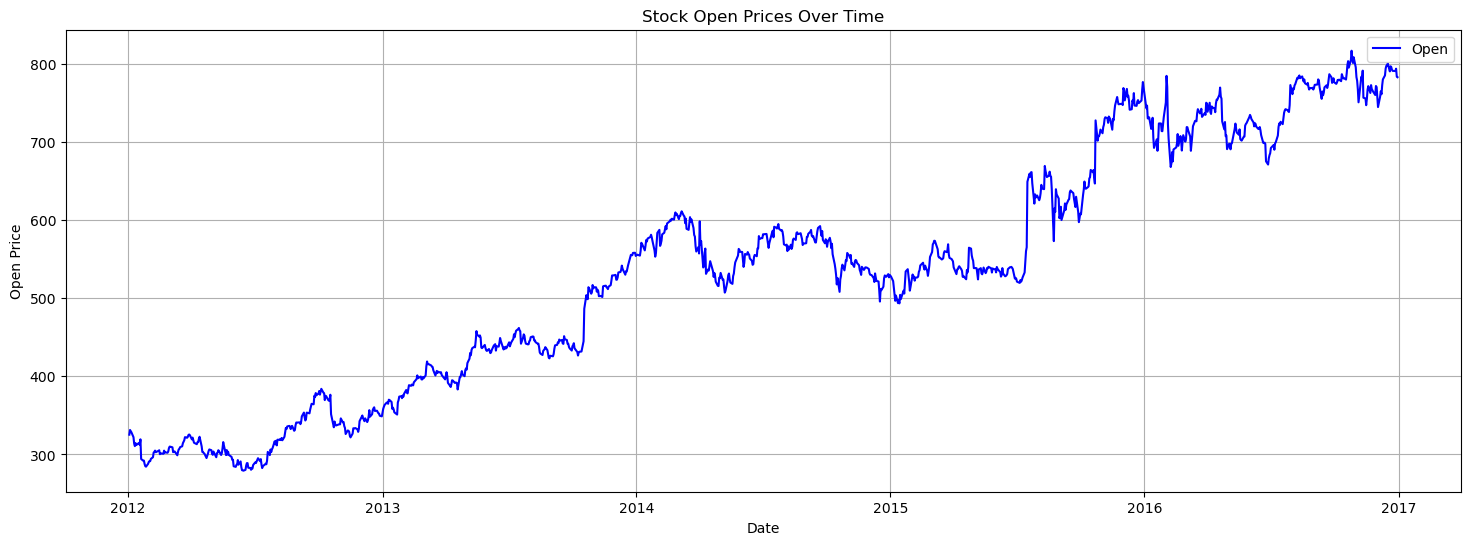

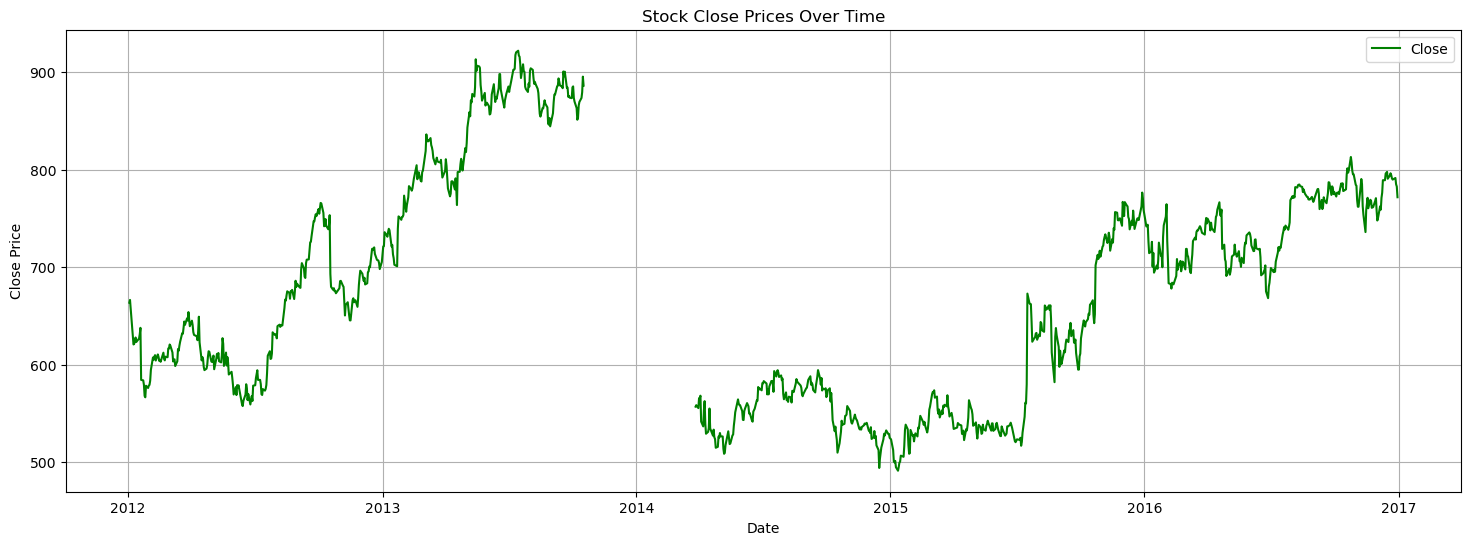

In [10]:
# Plot the stock data for the training dataset
plot_stock_data(train_data)

Based on the graphs provided:

1. **Stock Open Prices Over Time**
   - This graph shows the stock's opening price over the years from 2012 to 2017.
   - There is a clear upward trend in the open price, particularly after 2013. The price fluctuates between 300 to 500 for the first few years and then begins a steady increase, peaking around 2015–2017.
   - Some spikes and dips are visible, especially around 2015, which may indicate volatile periods in the stock's performance.

2. **Stock Close Prices Over Time**
   - The closing prices mirror the open prices to some extent but are slightly more volatile, with larger fluctuations between 2012 and 2014.
   - Similar to the open prices, there is an upward trend, with the closing price steadily increasing after 2014 and peaking in the later years.
   - The closing price generally shows a smoother increase, with some periods of decline or correction around 2015.
   - A noticeable dip occurs in 2015, indicating a potential period of underperformance or market correction.
   - It's clear there are some missing values around the end of 2013 until the beginning of 2014

### Key Observations:
- Both the opening and closing prices show an upward trend from 2013 onwards, with a peak toward 2017.
- The opening prices appear more volatile with larger fluctuations in the earlier years (2012-2014), while the closing prices tend to smooth out these fluctuations more over time.
- The period after 2014, especially 2015, seems to show a significant correction or drop before resuming growth, which is observable in both open and close prices.

### Insights:
- If focusing on post-2014 data, this period might represent a more stable growth phase with fewer drastic fluctuations compared to the earlier years.
- Hence we want to focus on modeling the data after 2014 for more consistent performance trends or predictions, particularly to aim for more stable forecasting.

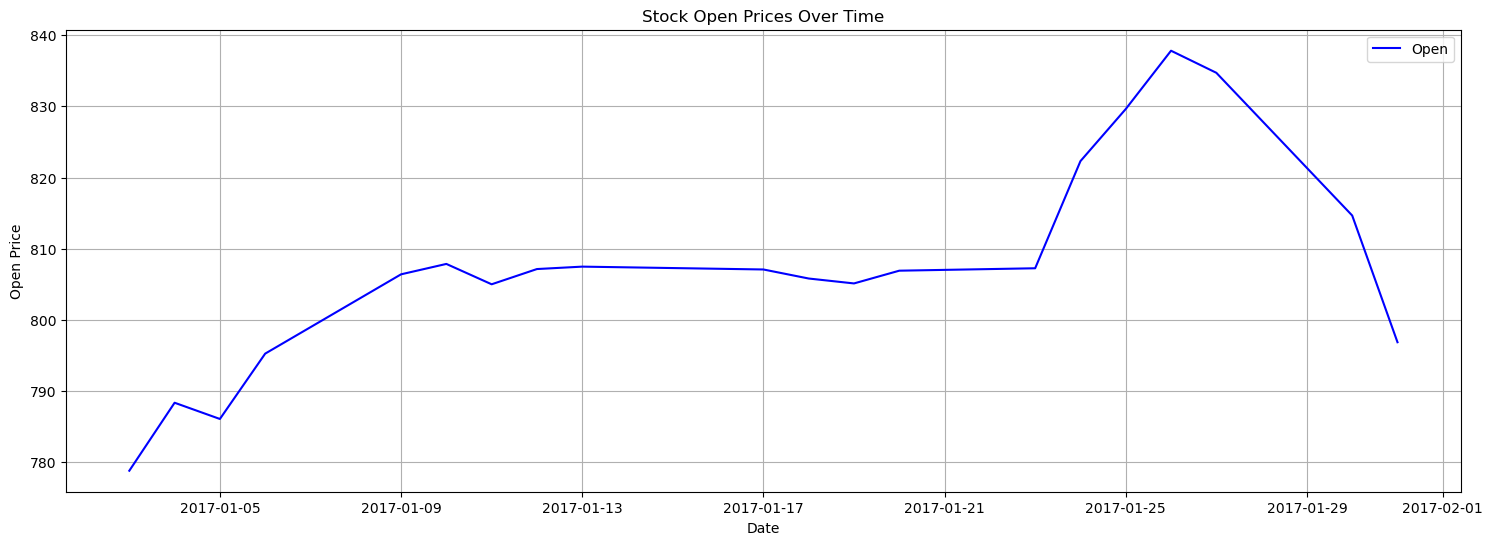

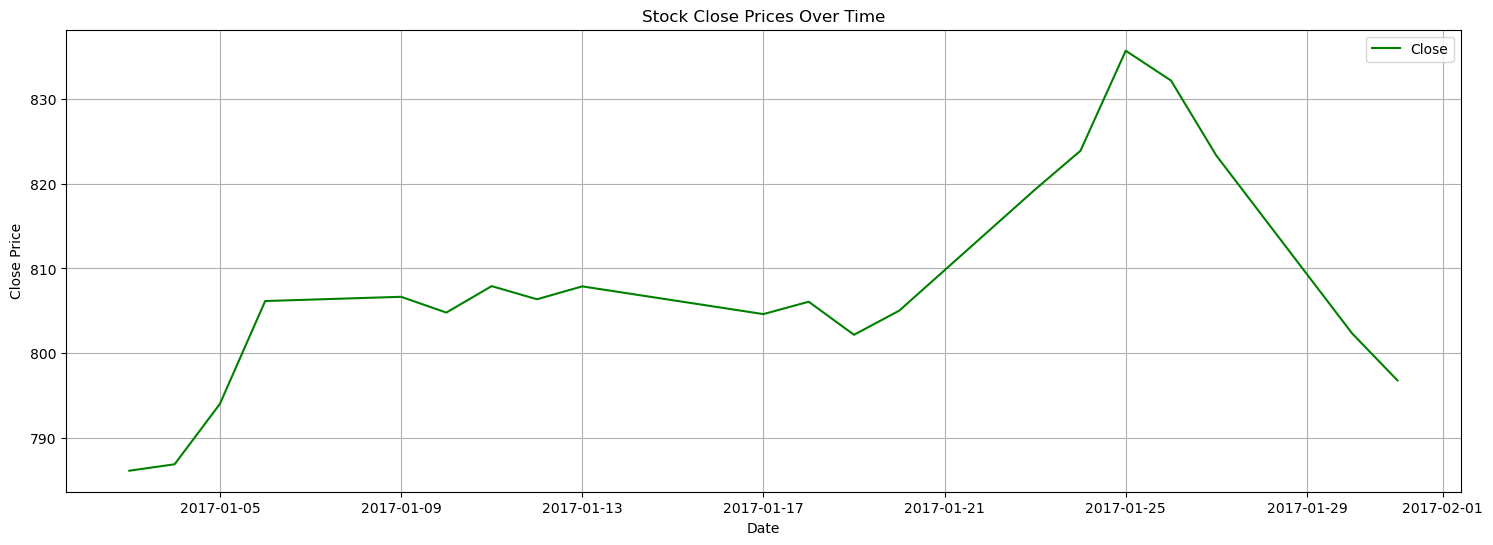

In [11]:
# Plot the stock data for the test dataset
plot_stock_data(test_data)

### Filtering Data

In [12]:
# Filter the data from 2014 onwards and exclude rows with missing values
train_data_filtered = train_data[train_data['Date'] >= '2014-01-01'].dropna()

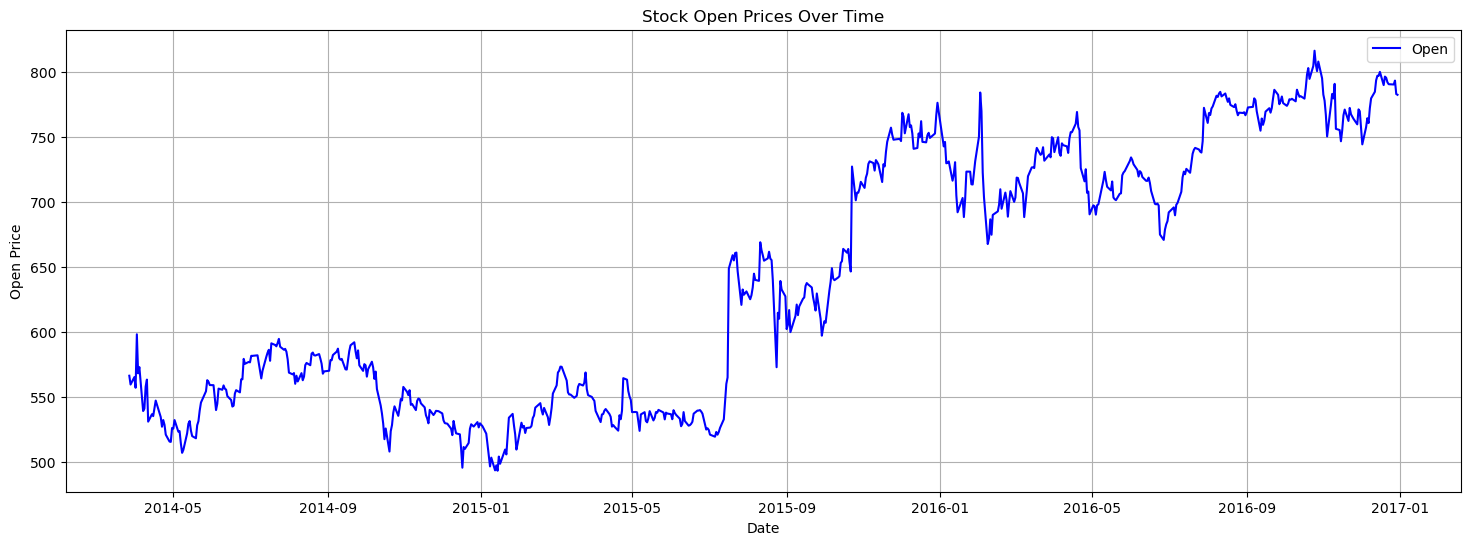

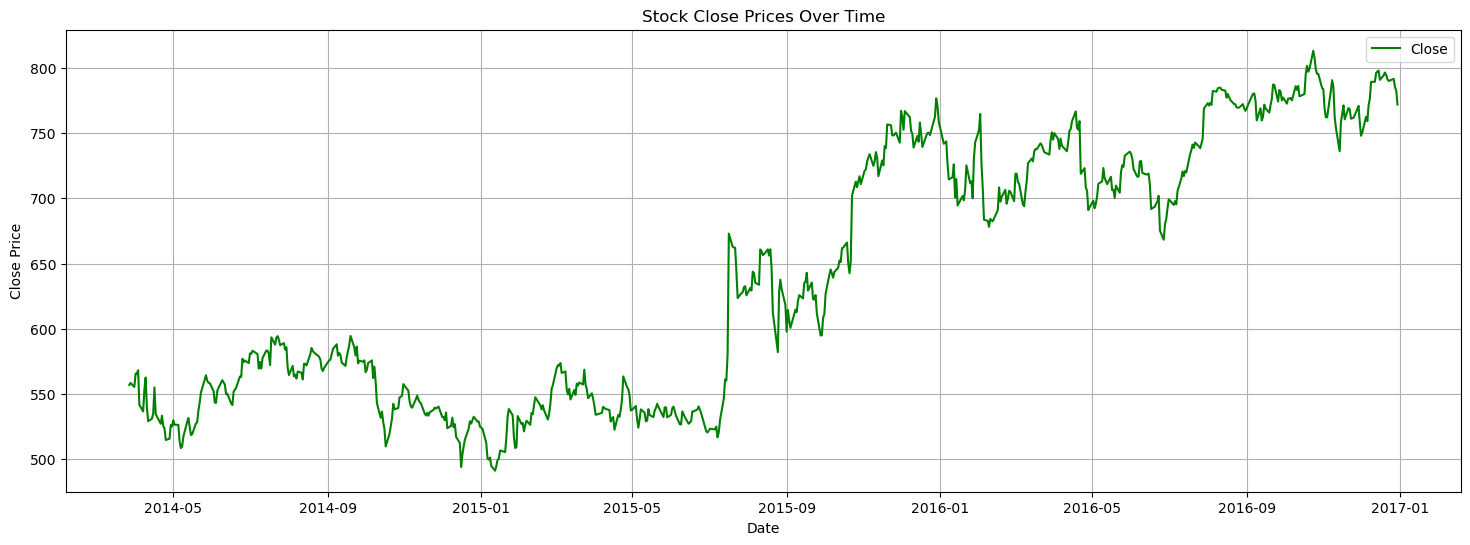

In [13]:
plot_stock_data(train_data_filtered)

After filtering the data, a clearer and more stable growth pattern becomes evident.


### Store Filtered Data

Then we stored the filtered traning data and test data.

In [14]:
# Save the filtered DataFrame to a new CSV file
train_data_filtered.to_csv('/Users/aries/Downloads/StockPrediction/data/interim/train_data_2014_onwards.csv', index=False)
test_data.to_csv('/Users/aries/Downloads/StockPrediction/data/interim/test_data_cleaned.csv', index=False)